# Tasks
- The features to analyze: 
    - VitD_levels
    - Doc_visits
    - TotalCharge
- For each feature listed:

    - Plot a histogram with a kde (kernel density estimate)
    - Add a line for the mean (red)
    - Add a line for the median (green)
    - Add a line for for +1 std from the mean (black)
    - Add a line for the - 1 std from the mean (black)
    - Highlight the range between +1 and =1 std (yellow)
    
Answer the following questions:

    - Is it Discrete or Continuous?
    - Does it have a skew? If so, which direction (+/-)
    - What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

In [38]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
os.makedirs('Data/',exist_ok=True) 
os.listdir('Data')
df=pd.read_csv('Data/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

## VitD_levels

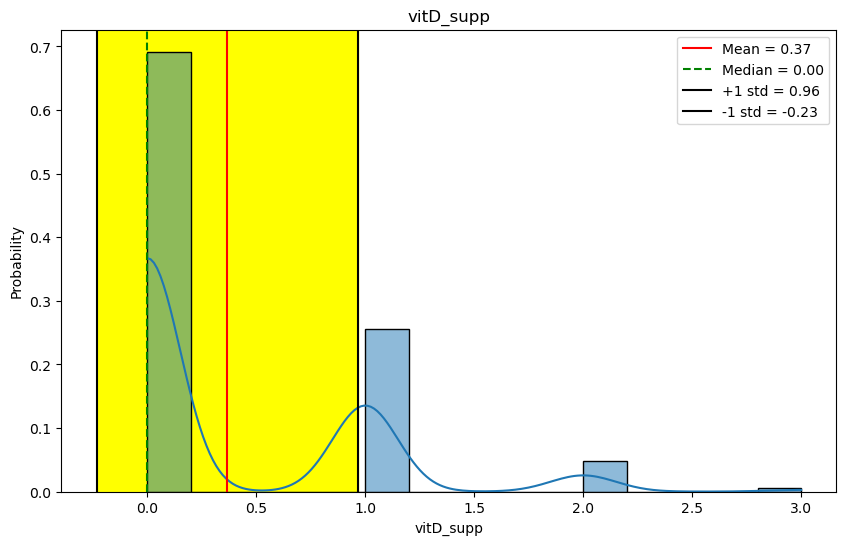

In [39]:
col = 'vitD_supp'


feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability' ,kde = True)
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

In [40]:
kurt_vit = stats.kurtosis(df['vitD_supp'], fisher = False)
kurt_vit

4.964834590299517

### Questions:
- Is it Discrete or Continuous?
    - discrete, only 3 avaliable values
- Does it have a skew? If so, which direction (+/-)
    - positive skew. tail trails off to the right.
- What type of kurtosis does it display?
    - Leptokurtic

## Doc_visits

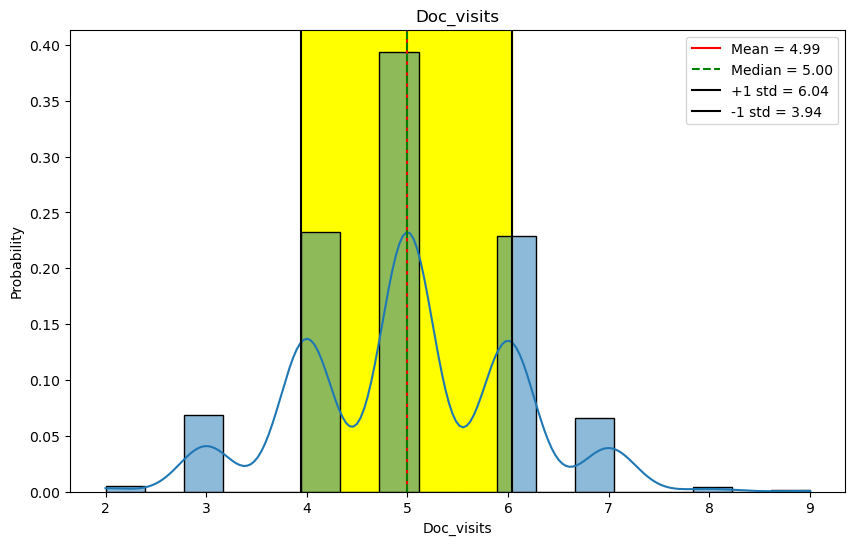

In [41]:
col = 'Doc_visits'

feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability' ,kde = True)
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

In [42]:
kurt_visit = stats.kurtosis(df['Doc_visits'], fisher = False)
kurt_visit

2.9919958083381206

### Questions:
- Is it Discrete or Continuous?
    - Discrete(finite values)
- Does it have a skew? If so, which direction (+/-)
    - normal distribution(no skew)
- What type of kurtosis does it display?
    - pearsons calc would state Platykurtic, but on first glance it clearly looks Mesokurtic

## TotalCharge

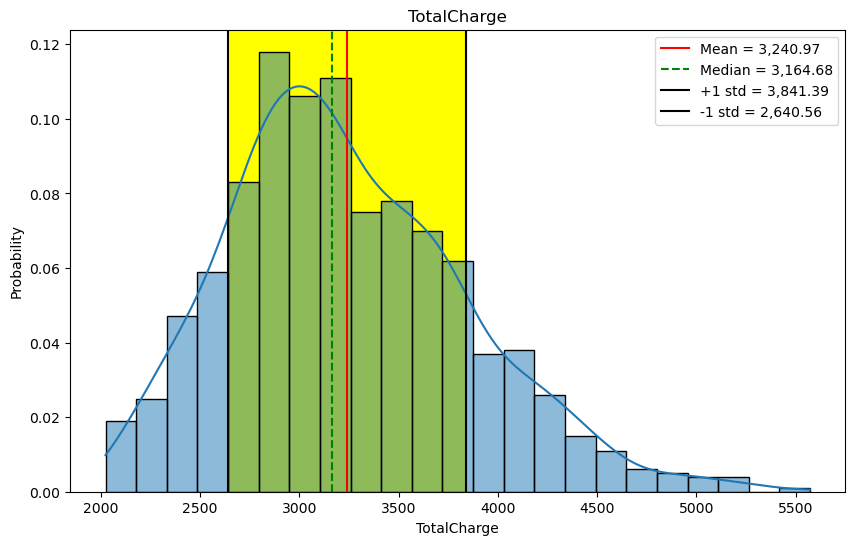

In [43]:
col = 'TotalCharge'

feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability' ,kde = True)
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

In [44]:
kurt_charge = stats.kurtosis(df['TotalCharge'], fisher = False)
kurt_charge

3.2650077463439384

### Questions:
-Is it Discrete or Continuous?
    - Continious(dollar value nearly infinite)
- Does it have a skew? If so, which direction (+/-)
    - slightly positive skew, trail trails to the right
- What type of kurtosis does it display?
    - Leptokurtic